## Imports

In [21]:
from detectron2.data.datasets import register_coco_instances
import numpy as np
import time

In [22]:
from detectron2.data.datasets import register_coco_panoptic_separated, register_coco_panoptic, register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog, Metadata
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
import cv2
import random
from detectron2.utils.visualizer import Visualizer
from thermal_dataset_mapper import ThermalDatasetMapper

In [23]:
import json
import os
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2 import model_zoo
from detectron2.config import get_cfg

## Open the original JSON File and set the paths according to your folder structure

In [24]:
json_file = open("Flug1_105Media_panoptic_coco_categories copy.json")

In [25]:
categories = json.load(json_file)

In [26]:
categories

[{'supercategory': 'Thermal bridge',
  'color': [220, 20, 60],
  'isthing': 1,
  'id': 1,
  'name': 'Thermal bridge'}]

In [27]:
images_dir = "train"
panoptic_json = "Flug1_100-104Media_coco_panoptic_format.json"
panoptic_root = "Flug1_100-104Media_coco_panoptic_format"
sem_seg_root = "Flug1_100-104Media_FPN_semantic_Mask"
instances_json = "Flug1_100-104Media_coco.json"

In [28]:
#images_dir = "test/images/Flug1_105"
#panoptic_json = "Flug1_105Media_coco_panoptic_format.json"
#panoptic_root = "Flug1_105Media_coco_panoptic_format/Flug1_105"
#sem_seg_root_train = "Flug1_105Media_FPN_semantic_Mask/Flug1_105"
#instances_json = "Flug1_105Media_coco.json"

In [29]:
time = time.asctime(time.localtime(time.time()))

### Give the data set a name for the temporary registration

In [30]:
register_name = "Konferenz_test_thermal_panoptic_" + time
register_name

'Konferenz_test_thermal_panoptic_Mon Apr 24 11:53:57 2023'

### Split into the categories things and stuff

In [31]:
#stuff_names=["things", "background", "sky", "other"]
#stuff_dataset_id_to_contiguous_id = {0:0, 4:1, 5:2, 3:255}

stuff_names=["things", "other"]
stuff_dataset_id_to_contiguous_id = {0:0,1:255}

In [32]:
things_names = [f["name"] for f in categories if f["isthing"] == 1]
things_ids = [f["id"] for f in categories if f["isthing"] == 1]
things_dataset_id_to_contiguous_id = dict(zip(things_ids, list(range(0, len(things_ids)))))
print(things_dataset_id_to_contiguous_id)
print(things_names)

{1: 0}
['Thermal bridge']


In [33]:
things_dataset_id_to_contiguous_id

{1: 0}

## Data set Detectron2 Registration

In [34]:
register_coco_panoptic_separated(name=register_name, metadata={}, image_root=images_dir, panoptic_root=panoptic_root, 
                                 panoptic_json=panoptic_json, sem_seg_root=sem_seg_root, instances_json=instances_json)

In [35]:
#register_coco_panoptic(name=register_name, metadata={}, image_root=images_dir, panoptic_root=panoptic_root, panoptic_json=panoptic_json, instances_json=instances_json)

In [36]:
#register_coco_panoptic_separated(name=register_name, metadata={}, image_root=images_dir, panoptic_root=panoptic_root, panoptic_json=panoptic_json, sem_seg_root=None, instances_json=instances_json)

In [37]:
register_coco_instances(name=register_name, metadata={}, json_file=instances_json, image_root=images_dir)
DatasetCatalog.get(register_name)

[{'file_name': 'train/Flug1_100/DJI_0047_R.jpg',
  'height': 2680,
  'width': 3370,
  'image_id': 0,
  'annotations': [{'iscrowd': 0,
    'bbox': [1315.0, 1421.0, 53.0, 102.0],
    'category_id': 0,
    'segmentation': [[1319.0,
      1446.0,
      1337.0,
      1421.0,
      1337.0,
      1456.0,
      1368.0,
      1456.0,
      1323.0,
      1523.0,
      1315.0,
      1449.0,
      1319.0,
      1446.0]],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>},
   {'iscrowd': 0,
    'bbox': [224.0, 20.0, 129.0, 3.0],
    'category_id': 0,
    'segmentation': [[236.0,
      23.0,
      224.0,
      23.0,
      236.0,
      23.0,
      254.0,
      23.0,
      302.0,
      23.0,
      332.0,
      23.0,
      353.0,
      23.0,
      351.0,
      20.0,
      236.0,
      22.0]],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>}]},
 {'file_name': 'train/Flug1_100/DJI_0049_R.jpg',
  'height': 2680,
  'width': 3370,
  'image_id': 1,
  'annotations': [{'iscrowd': 0,
    'bbox': [1312.0, 1480.0, 71.0, 121.0],
    

In [39]:
DatasetCatalog

DatasetCatalog(registered datasets: coco_2014_train, coco_2014_val, coco_2014_minival, coco_2014_valminusminival, coco_2017_train, coco_2017_val, coco_2017_test, coco_2017_test-dev, coco_2017_val_100, keypoints_coco_2014_train, keypoints_coco_2014_val, keypoints_coco_2014_minival, keypoints_coco_2014_valminusminival, keypoints_coco_2017_train, keypoints_coco_2017_val, keypoints_coco_2017_val_100, coco_2017_train_panoptic_separated, coco_2017_train_panoptic_stuffonly, coco_2017_train_panoptic, coco_2017_val_panoptic_separated, coco_2017_val_panoptic_stuffonly, coco_2017_val_panoptic, coco_2017_val_100_panoptic_separated, coco_2017_val_100_panoptic_stuffonly, coco_2017_val_100_panoptic, lvis_v1_train, lvis_v1_val, lvis_v1_test_dev, lvis_v1_test_challenge, lvis_v0.5_train, lvis_v0.5_val, lvis_v0.5_val_rand_100, lvis_v0.5_test, lvis_v0.5_train_cocofied, lvis_v0.5_val_cocofied, cityscapes_fine_instance_seg_train, cityscapes_fine_sem_seg_train, cityscapes_fine_instance_seg_val, cityscapes_fi

### Check if the registration worked

In [40]:
DatasetCatalog.get(register_name + "_separated")
#DatasetCatalog.get(register_name + "_stuffonly")
#DatasetCatalog.get(register_name)

Directory train and Flug1_100-104Media_FPN_semantic_Mask has 0 and 566 files, respectively.
Will use their intersection of 0 files.


AssertionError: 

In [362]:
metadata_test = MetadataCatalog.get(register_name + "_separated")
metadata_test
#metadata_test = MetadataCatalog.get(register_name)

namespace(name='Konferenz_test_thermal_panoptic_Sun Apr 23 19:05:20 2023_separated',
          panoptic_root='Flug1_105Media_coco_panoptic_format/Flug1_105',
          image_root='test/images/Flug1_105',
          panoptic_json='Flug1_105Media_coco_panoptic_format.json',
          sem_seg_root='Flug1_105Media_FPN_semantic_Mask/Flug1_105',
          json_file='Flug1_105Media_coco.json',
          evaluator_type='coco_panoptic_seg',
          ignore_label=255,
          thing_classes=['Thermal bridge'],
          thing_dataset_id_to_contiguous_id={1: 0})

In [363]:
#from PIL import Image
#with Image.open("../panopticapi/Flug1_105Media_FPN_semantic_Mask/Flug1_105/DJI_0004_R.png") as im:
#    im.show()

In [370]:
metadata_train = MetadataCatalog.get(register_name + "_separated").set(stuff_classes=stuff_names, stuff_dataset_id_to_contiguous_id=stuff_dataset_id_to_contiguous_id)

## Plot an example image

In [384]:
def plot_samples(dataset_name, n=1):
    dataset_custom = DatasetCatalog.get(dataset_name)
    dataset_custom_metadata = MetadataCatalog.get(dataset_name)

    for s in random.sample(dataset_custom, n):
        img = cv2.imread(s["file_name"])
        v = Visualizer(img[:, :, ::-1], metadata=dataset_custom_metadata, scale = 0.5)
        v = v.draw_dataset_dict(s)
        plt.figure(figsize=(15, 20))
        plt.imshow(v.get_image())
        plt.show()

In [385]:
#def plot_samples(dataset_name, n=1):
#    dataset_custom = DatasetCatalog.get(dataset_name)
#    dataset_custom_metadata = MetadataCatalog.get(dataset_name)

#    for s in random.sample(dataset_custom, n):
#        img = cv2.imread(s["file_name"])
#        v = Visualizer(img[:, :, ::-1], metadata=dataset_custom_metadata, scale = 0.5)
#        v = v.draw_dataset_dict(s)
#        plt.figure(figsize=(15, 20))
#        plt.imshow(v.get_image())
#        plt.show()

In [386]:
plot_samples(register_name + "_separated", n=1)

[04/23 21:46:58 d2.data.datasets.coco]: Loaded 203 images in COCO format from Flug1_105Media_coco.json
[04/23 21:46:58 d2.data.datasets.coco]: Loaded 203 images with semantic segmentation from test/images/Flug1_105


## Define the model and train it

In [387]:
cfg = get_cfg()

In [388]:
cfg.OUTPUT_DIR = "Output/panoptic_seg_fpn_R_101_3x"
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = (register_name + "_separated",)
#cfg.DATASETS.TRAIN = (register_name)
cfg.MODEL.DEVICE = "cpu"
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")  
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2  
cfg.SOLVER.BASE_LR = 0.0000025  
cfg.SOLVER.MAX_ITER = 50    
cfg.SOLVER.STEPS = []        
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(metadata_train.thing_dataset_id_to_contiguous_id)
cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 2

In [389]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

[04/23 21:47:13 d2.engine.defaults]: Model:
PanopticFPN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): 

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

In [390]:
cfg

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': True, 'KEYPOINT_ON': False, 'DEVICE': 'cpu', 'META_ARCHITECTURE': 'PanopticFPN', 'WEIGHTS': 'https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res2', 'res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32], [64], [128], [256], [512]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATURES': ['p2', 'p3', 'p4', 'p5', 'p6'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER

In [391]:
trainer.train()

[04/23 21:47:15 d2.engine.train_loop]: Starting training from iteration 0
ERROR [04/23 21:51:15 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/home/lars/VisualStudio/Konferenz/detectron2/detectron2/engine/train_loop.py", line 155, in train
    self.run_step()
  File "/home/lars/VisualStudio/Konferenz/detectron2/detectron2/engine/defaults.py", line 494, in run_step
    self._trainer.run_step()
  File "/home/lars/VisualStudio/Konferenz/detectron2/detectron2/engine/train_loop.py", line 303, in run_step
    self._write_metrics(loss_dict, data_time)
  File "/home/lars/VisualStudio/Konferenz/detectron2/detectron2/engine/train_loop.py", line 336, in _write_metrics
    SimpleTrainer.write_metrics(loss_dict, data_time, prefix)
  File "/home/lars/VisualStudio/Konferenz/detectron2/detectron2/engine/train_loop.py", line 372, in write_metrics
    raise FloatingPointError(
FloatingPointError: Loss became infinite or NaN at iteration=19!
loss_dict = {'lo

FloatingPointError: Loss became infinite or NaN at iteration=19!
loss_dict = {'loss_sem_seg': nan, 'loss_rpn_cls': 2.0207693576812744, 'loss_rpn_loc': 0.3060998022556305, 'loss_cls': 0.7109498381614685, 'loss_box_reg': 0.06753157079219818, 'loss_mask': 0.693905770778656}

## Test data set registration

Identical to the registration before before

In [339]:
#images_dir_test = "test/images/Flug1_105"
#panoptic_json_test = "Flug1_105Media_coco_panoptic_format.json"
#panoptic_root_test = "Flug1_105Media_coco_panoptic_format/Flug1_105"
#sem_seg_root_test = "Flug1_105Media_FPN_semantic_Mask/Flug1_105"
#instances_json_test = "Flug1_105Media_coco.json"

In [336]:
register_name_test = "Panoptic_Dataset__test_fpn"

In [337]:
stuff_dataset_id_to_contiguous_id = {0:0, 1:255}

In [338]:
meta_pre = {"stuff_classes": stuff_names, "stuff_dataset_id_to_contiguous_id": stuff_dataset_id_to_contiguous_id,
            "thing_dataset_id_to_contiguous_id": things_dataset_id_to_contiguous_id, "thing_classes":things_names}

In [340]:
register_coco_panoptic_separated(name=register_name_test, metadata=meta_pre, image_root=images_dir_test, panoptic_root=panoptic_root_test, panoptic_json=panoptic_json_test,
sem_seg_root=sem_seg_root_test, instances_json=instances_json_test)

In [341]:
MetadataCatalog.get(register_name_test + "_separated")#.set(stuff_classes=stuff_names, stuff_dataset_id_to_contiguous_id=stuff_dataset_id_to_contiguous_id)

namespace(name='Panoptic_Dataset__test_fpn_separated',
          panoptic_root='Flug1_105Media_coco_panoptic_format/Flug1_105',
          image_root='test/images/Flug1_105',
          panoptic_json='Flug1_105Media_coco_panoptic_format.json',
          sem_seg_root='Flug1_105Media_FPN_semantic_Mask/Flug1_105',
          json_file='Flug1_105Media_coco.json',
          evaluator_type='coco_panoptic_seg',
          ignore_label=255,
          stuff_classes=['things', 'other'],
          stuff_dataset_id_to_contiguous_id={0: 0, 1: 255},
          thing_dataset_id_to_contiguous_id={1: 0},
          thing_classes=['Thermal bridge'])

In [342]:
DatasetCatalog.get(register_name_test + "_separated")

[04/23 19:03:20 d2.data.datasets.coco]: Loaded 203 images in COCO format from Flug1_105Media_coco.json
[04/23 19:03:20 d2.data.datasets.coco]: Loaded 203 images with semantic segmentation from test/images/Flug1_105


[{'file_name': 'test/images/Flug1_105/DJI_0004_R.jpg',
  'height': 2680,
  'width': 3370,
  'image_id': 0,
  'annotations': [{'iscrowd': 0,
    'bbox': [1180.0, 888.0, 169.0, 165.0],
    'category_id': 0,
    'segmentation': [[1349.0,
      890.0,
      1345.0,
      936.0,
      1309.0,
      948.0,
      1200.0,
      1053.0,
      1180.0,
      1051.0,
      1188.0,
      1035.0,
      1339.0,
      888.0,
      1349.0,
      890.0]],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>},
   {'iscrowd': 0,
    'bbox': [2877.0, 1527.0, 109.0, 422.0],
    'category_id': 0,
    'segmentation': [[2906.0,
      1945.0,
      2877.0,
      1949.0,
      2966.0,
      1531.0,
      2984.0,
      1527.0,
      2986.0,
      1586.0,
      2908.0,
      1943.0]],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>},
   {'iscrowd': 0,
    'bbox': [1307.0, 1949.0, 166.0, 210.0],
    'category_id': 0,
    'segmentation': [[1473.0,
      2128.0,
      1442.0,
      2159.0,
      1307.0,
      1955.0,
      1339.0,
      19

In [26]:
#MetadataCatalog.get("Panoptic_Dataset_Buildings_train_separated")

In [27]:
#MetadataCatalog.get(register_name_test + "_separated").set(
#    thing_classes=things_names, thing_dataset_id_to_contiguous_id=things_dataset_id_to_contiguous_id)

In [28]:
metadata_test = MetadataCatalog.get(register_name_test + "_separated")

## Loading of the trained weights from before

In [29]:
##Evaluation Code
cfg.MODEL.WEIGHTS = ("../Output/segmentation_fpn_R_101_3x/model_final.pth")
cfg.DATASETS.TEST = (register_name_test + "_separated")

## Plot a new image with the predicted segmentation

In [30]:
def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');

## Test on a new image

In [32]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25  # set the testing threshold for this model
cfg.MODEL.DEVICE = "cpu"
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get(register_name_test + "_separated")
#im = cv2.imread("Dataset/images/test/20211222_094416_588_R_rgb_image.jpg")
im = cv2.imread("Dataset/Oberdorf.jpeg")
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TEST), scale=1.2)

/home/tahubach/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## A closer look at the predictions

In [33]:
segments_info

[{'id': 1,
  'isthing': True,
  'score': 0.995604395866394,
  'category_id': 0,
  'instance_id': 0},
 {'id': 2,
  'isthing': True,
  'score': 0.9950814247131348,
  'category_id': 0,
  'instance_id': 1},
 {'id': 3,
  'isthing': True,
  'score': 0.9932963252067566,
  'category_id': 0,
  'instance_id': 2},
 {'id': 4,
  'isthing': True,
  'score': 0.992021381855011,
  'category_id': 0,
  'instance_id': 3},
 {'id': 5,
  'isthing': True,
  'score': 0.9909736514091492,
  'category_id': 0,
  'instance_id': 4},
 {'id': 6,
  'isthing': True,
  'score': 0.9902162551879883,
  'category_id': 0,
  'instance_id': 5},
 {'id': 7,
  'isthing': True,
  'score': 0.9795734882354736,
  'category_id': 0,
  'instance_id': 6},
 {'id': 8,
  'isthing': True,
  'score': 0.9680001735687256,
  'category_id': 0,
  'instance_id': 7},
 {'id': 9,
  'isthing': True,
  'score': 0.9645347595214844,
  'category_id': 0,
  'instance_id': 8},
 {'id': 10,
  'isthing': True,
  'score': 0.9492660164833069,
  'category_id': 0,
  

In [41]:
panoptic_seg

tensor([[ 0,  0,  0,  ..., 26, 26, 26],
        [ 0,  0,  0,  ..., 26, 26, 26],
        [ 0,  0,  0,  ..., 26, 26, 26],
        ...,
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0]], dtype=torch.int32)

In [42]:
import torch
torch.unique(panoptic_seg)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=torch.int32)

In [43]:
metadata_test.stuff_classes

['things', 'background', 'sky', 'other']

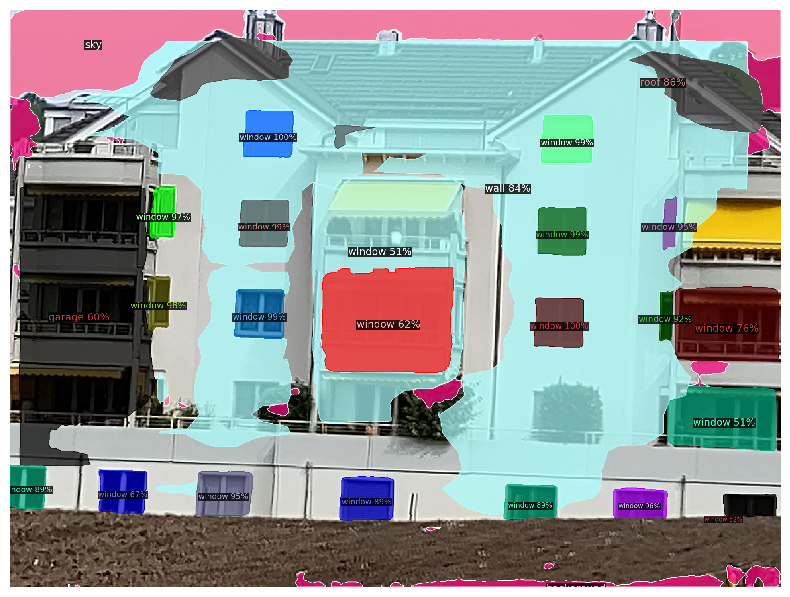

In [44]:
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])
plt.savefig("example_panoptic_image_fpn_R101_3x.png")

If the model was not loaded before, here it has to be done to evaluate the model

In [46]:
##Evaluation Code
#cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = ("../Output/segmentation_fpn_R_101_3x/model_final.pth")
cfg.DATASETS.TEST = (register_name_test +"_separated")

In [47]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25 # set threshold for this model

In [48]:
# Create predictor
predictor = DefaultPredictor(cfg)

[11/05 18:11:10 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

In [49]:
from detectron2.evaluation import inference_on_dataset, COCOPanopticEvaluator
from detectron2.data import build_detection_test_loader

## Evaluate with COCOPanopticEvaluator on the test set

In [50]:
# evaluate model predictions
evaluator = COCOPanopticEvaluator(register_name_test +"_separated", output_dir = "../Output/segmentation_fpn_R_101_3x/results_evaluation") #COCOEvaluator

In [51]:
DatasetCatalog.get(register_name_test +"_separated")

WARNING [11/05 18:11:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/05 18:11:11 d2.data.datasets.coco]: Loaded 5 images in COCO format from Dataset/annotations/instances_test2.json
[11/05 18:11:11 d2.data.datasets.coco]: Loaded 5 images with semantic segmentation from Dataset/images/test


[{'file_name': 'Dataset/images/test/20220121_080144_128_R_rgb_image.jpg',
  'height': 3000,
  'width': 4000,
  'image_id': 18,
  'annotations': [{'iscrowd': False,
    'bbox': [9, 1711, 3332, 1289],
    'category_id': 7,
    'segmentation': [[9.2,
      1769.7,
      801.7,
      1742.9,
      2208.6,
      1711.2,
      3335.5,
      2098.7,
      3341.4,
      2124.6,
      3332,
      2124.6,
      3328.5,
      2209.3,
      3168.5,
      2201,
      2938.6,
      2198.6,
      2540.6,
      2150.5,
      2489.5,
      2992.5,
      2251.3,
      2992.5,
      2273.8,
      2736.6,
      2175.1,
      2728.5,
      2160.2,
      2997.8,
      1719,
      2997.8,
      1724.4,
      2890.2,
      1778.2,
      2897,
      1776.1,
      2806.5,
      1632.5,
      2732.8,
      1455.1,
      2700.7,
      1314.4,
      2754.6,
      1275.4,
      2842.4,
      1319.3,
      2876.6,
      1365.7,
      2952.1,
      1338.8,
      3005.8,
      914.6,
      3000.9,
      890.2,
      2

In [52]:
val_loader = build_detection_test_loader(cfg, register_name_test +"_separated")

WARNING [11/05 18:11:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/05 18:11:11 d2.data.datasets.coco]: Loaded 5 images in COCO format from Dataset/annotations/instances_test2.json
[11/05 18:11:11 d2.data.datasets.coco]: Loaded 5 images with semantic segmentation from Dataset/images/test
[11/05 18:11:11 d2.data.build]: Distribution of instances among all 8 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|   window   | 42           |    door    | 5            |    wall    | 5            |
|    pipe    | 12           |    vent    | 4            |    roof    | 6            |
|  balcony   | 2            |   garage   | 4            |            |              |
|   total    | 80           |            |              |            |              |
[11/05 18:11:11 d2.data.dataset_mapper]

In [53]:
eval_results=inference_on_dataset(predictor.model, val_loader, evaluator)

[11/05 18:11:14 d2.evaluation.evaluator]: Start inference on 5 batches
[11/05 18:11:35 d2.evaluation.evaluator]: Total inference time: 0:00:04.049910 (4.049910 s / iter per device, on 1 devices)
[11/05 18:11:35 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (2.954631 s / iter per device, on 1 devices)
[11/05 18:11:35 d2.evaluation.panoptic_evaluation]: Writing all panoptic predictions to /tmp/panoptic_eval7d8niyvt ...
[11/05 18:12:21 d2.evaluation.panoptic_evaluation]: Panoptic Evaluation Results:
|        |   PQ   |   SQ   |   RQ    |  #categories  |
|:------:|:------:|:------:|:-------:|:-------------:|
|  All   | 47.260 | 56.891 | 56.785  |      10       |
| Things | 36.597 | 48.636 | 45.981  |       8       |
| Stuff  | 89.910 | 89.910 | 100.000 |       2       |


In [54]:
eval_results

OrderedDict([('panoptic_seg',
              {'PQ': 47.25992080231123,
               'SQ': 56.89067609290497,
               'RQ': 56.78508771929825,
               'PQ_th': 36.597456115935586,
               'SQ_th': 48.63590022917777,
               'RQ_th': 45.98135964912281,
               'PQ_st': 89.90977954781377,
               'SQ_st': 89.90977954781377,
               'RQ_st': 100.0})])

## Tensorboard to visualize the training

In [52]:
%reload_ext tensorboard

In [54]:
%tensorboard --logdir ../Output/segmentation_fpn_R_101_3x